# SST anomalies
Plot the SST anomalies for the Global Ocean or for regional domains.    
Prepared to work with MODIS-Terra SST 4 µm nightime data, at 9 km resolution, download from [Ocean Color](https://oceancolor.gsfc.nasa.gov/).

In [23]:
import sys
sys.path.insert(0, '..')
import os
import glob
import numpy as np
from filament import filament
import datetime
import cmocean
import logging
import calendar
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
coast = cfeature.GSHHSFeature(scale="l")
datacrs = ccrs.PlateCarree()
plt.style.use("filament.mplstyle")

In [2]:
from matplotlib.font_manager import FontProperties
fontfile = "/home/ctroupin/.fonts/Barlow-Regular.ttf"
#fontfile = "/home/ctroupin/.fonts/DS-DIGI.TTF"
myfont = FontProperties(fname=fontfile)

## Logger

In [3]:
logger = logging.getLogger("SSTanom")
logger.setLevel(logging.INFO)
logging.info("Starting")

## Files and directories

In [7]:
yearlist = range(2002, 2024)
sat = "TERRA"
sensor = "MODIS"
figdir = "/home/ctroupin/data/OceanColor/Global/figures/"
monthlydir = "/home/ctroupin/data/OceanColor/Monthly/"
climdir = "/home/ctroupin/data/SST/Global/monthly_clim/"
if not os.path.exists(figdir):
    os.makedirs(figdir)

bgcolor = "black"
fgcolor = "white"

doplotanom = True
doplotfield = True

## Plot preparation
### Projection
Extract the coordinates from one the file

In [13]:
datafilelist = sorted(glob.glob(os.path.join(monthlydir, "*.nc")))

chloromonth = filament.Chloro()
chloromonth.

In [18]:
with netCDF4.Dataset(datafilelist[0]) as nc:
    chloro = nc.get_variables_by_attributes(standard_name="mass_concentration_of_chlorophyll_in_sea_water")[0][:]
    lon = nc.get_variables_by_attributes(standard_name="longitude")[0][:]
    lat = nc.get_variables_by_attributes(standard_name="latitude")[0][:]
    thedate = datetime.datetime.strptime(nc.time_coverage_end, "%Y-%m-%dT%H:%M:%S.000Z")
    
thedate

datetime.datetime(2020, 1, 31, 23, 54, 59)

In [19]:
myproj = ccrs.Orthographic(central_longitude=-20.0, central_latitude=20.0, globe=None)
myproj

<Derived Projected CRS: +proj=ortho +a=6378137.0 +lon_0=-20.0 +lat_0=20.0  ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Orthographic
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

In [27]:
chloro.min()

0.0038236578

/tmp/ipykernel_11578/2672071615.py:4: RuntimeWarning: invalid value encountered in log10
  pcm = ax.pcolormesh(lon, lat, np.log10(chloro), transform=datacrs, cmap=plt.cm.RdYlBu_r, vmin=-1.5, vmax=1.)


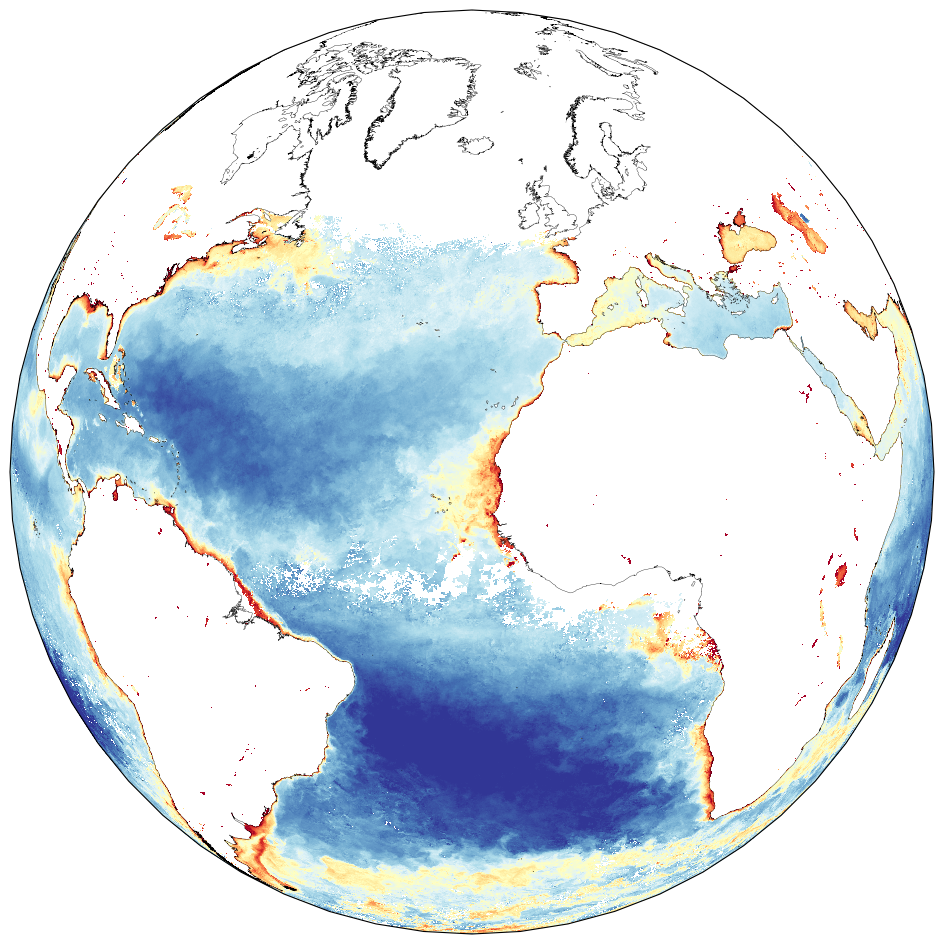

In [32]:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, projection=myproj)
ax.set_global()
pcm = ax.pcolormesh(lon, lat, np.log10(chloro), transform=datacrs, cmap=plt.cm.RdYlBu_r, vmin=-1.5, vmax=1.)
#cb = plt.colorbar(pcm)
ax.add_feature(coast, lw=.25)
plt.savefig(os.path.join(figdir, "chloro202001.jpg"), dpi=300, bbox_inches="tight")
plt.show()

In [34]:
regions_coords = {"MedSea": (-7, 17, 30., 48.),
                  "Canary": (-18.5, -13., 27.5, 29.5),
                  "Atlantic": (-80., 0., 0., 40.),
                  "Balearic": (1., 4.5, 38.5, 40.25),}
regionname = "Canary"
coordinates = regions_coords[regionname]

myproj = cartopy.crs.Mercator(central_longitude=0.5 * (coordinates[0] + coordinates[1]), 
                              min_latitude=coordinates[2], max_latitude=coordinates[3])

In [37]:
coordinates

(-18.5, -13.0, 27.5, 29.5)

### Plotting function

In [23]:
def make_monthly_subplot(SSTanom, month, NN=1, fgcolor="k", figtitle=None, year=None,
                        colorbar=True):
    
  
    
    pcm = ax.imshow(SSTanom[::NN,::NN], extent=sst_extent, cmap=plt.cm.RdBu_r, 
                    vmin=-2.5, vmax=2.5, zorder=2, transform=datacrs)
    
    ax.add_feature(coast, linewidth=.2, color=".15", zorder=5)
        
    if colorbar:
        cmap = mpl.cm.RdBu_r
        cmap.set_bad(color='grey')
        normanom = mpl.colors.Normalize(vmin=-2.5, vmax=2.5)
        cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.03])
        cb = plt.colorbar(pcm, cax=cbar_ax, shrink=.7, cmap=cmap, norm=normanom,
                     orientation='horizontal', extend="both")
        cb.set_label("$^{\circ}$C", fontsize=18, color=fgcolor, fontweight="bold")
        cb.ax.tick_params(axis='x', colors=fgcolor)
    
    #m.warpimage("world.topo.bathy.200403.3x5400x2700.jpg", zorder=2)
    #m.drawcoastlines(linewidth=.2, zorder=4, color="grey")
    #plt.savefig(os.path.join(figdir, "SST_anom_test"), dpi=300, bbox_inches="tight")
    # plt.show()
    #plt.close()
    return pcm

In [24]:
def make_monthly_SST_subplot(SST, NN=1, fgcolor="k"):
    
    pcm = ax.imshow(SST.field[::NN,::NN], extent=sst_extent, cmap=plt.cm.RdYlBu_r, 
                    vmin=0., vmax=30., zorder=2, transform=datacrs)
    ax.add_feature(coast, linewidth=.2, color=".15", zorder=5)
        
    cmap = mpl.cm.RdYlBu_r
    cmap.set_bad(color='grey')
    normfield = mpl.colors.Normalize(vmin=0., vmax=30.)
    cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.03])
    cb = plt.colorbar(pcm, cax=cbar_ax, shrink=.7, cmap=cmap, norm=normfield,
                 orientation='horizontal', extend="both")
    cb.set_label("$^{\circ}$C", fontsize=18, color=fgcolor, fontweight="bold")
    cb.ax.tick_params(axis='x', colors=fgcolor)
    
    #m.warpimage("world.topo.bathy.200403.3x5400x2700.jpg", zorder=2)
    #m.drawcoastlines(linewidth=.2, zorder=4, color="grey")
    #plt.savefig(os.path.join(figdir, "SST_anom_test"), dpi=300, bbox_inches="tight")
    # plt.show()
    #plt.close()
    return pcm

## Plot

In [ ]:
plt.close("all")


for year in yearlist[-1:]:
    logger.info("Working on year {}".format(year))
    monthlydiryear = f"{monthlydir}/{year}"


    #fig = plt.figure(figsize=(13, 10), facecolor=bgcolor)

    for imonth in range(1, 13):
        if imonth == 1:
            yearstart = 2001
        else: 
            yearstart = 2000
        if imonth <= 3:
            yearend = 2023
        else:
            yearend = 2022


        sstclimfile = filament.get_monthly_clim_filename(sat, sensor, yearstart, yearend, imonth, res="9km")
        sstmonthfile = filament.get_monthly_filename(sat, sensor, year, imonth, res="9km")
        sstclimfile = os.path.join(climdir, sstclimfile)
        sstmonthfile = os.path.join(monthlydiryear, sstmonthfile)

        if os.path.exists(sstclimfile) & os.path.exists(sstmonthfile):
            logger.info("Working on month {}/12 year {}".format(imonth, year))

            # Read data (lon, lat and SST)
            logger.info("Reading data from netCDF files")
            SSTmonth = filament.SST()
            SSTmonth.read_from_oceancolorL3(sstmonthfile)
            SSTclim = filament.SST()
            SSTclim.read_from_oceancolorL3(sstclimfile)

            # Compute anomalies
            SSTanom = SSTmonth.field - SSTclim.field

            # Individual figures
            logger.info("Creating figure")
            
            # SST anomalies
            
            if doplotanom:
                fig = plt.figure(1, figsize=(12, 12), facecolor=bgcolor)
                ax = plt.subplot(111, projection=myproj)
                ax.set_extent(coordinates)

                figtitle = "{} / {}".format(str(imonth).zfill(2), year)
                pcm = make_monthly_subplot(SSTanom, imonth+1, NN=1, fgcolor=fgcolor, 
                                           figtitle=figtitle)
                
                ax.text(0.01, 1, figtitle, horizontalalignment='left',
                        verticalalignment='top', fontsize=30, 
                        color=fgcolor, fontproperties=myfont,
                        transform = ax.transAxes)
                
                
                #plt.annotate(figtitle, xy=(0, 1), xycoords='axes fraction', fontsize=30, 
                #             color=fgcolor, fontproperties=myfont)
                

                logger.info("Saving figure")
                plt.savefig(os.path.join(figdir, "SSTanomalies_{}_{}.jpg".format(year, str(imonth).zfill(2))), 
                            facecolor=fig.get_facecolor())
                # plt.show()
                fig.clf()
                
            if doplotfield:
                fig = plt.figure(1, figsize=(12, 12), facecolor=bgcolor)
                ax = plt.subplot(111, projection=myproj)

                figtitle = "{} / {}".format(str(imonth).zfill(2), year)
                
                ax.text(0.01, 1, figtitle, horizontalalignment='left',
                        verticalalignment='top', fontsize=30, 
                        color=fgcolor, fontproperties=myfont, 
                        transform = ax.transAxes)
                
                #plt.annotate(figtitle, xy=(0, 1), xycoords='axes fraction', fontsize=30, 
                #             color=fgcolor, fontproperties=myfont)
                pcm = make_monthly_SST_subplot(SSTmonth, NN=1, fgcolor=fgcolor)


                logger.info("Saving figure")
                plt.savefig(os.path.join(figdir2, "SSTfield_RdBu_{}_{}.jpg".format(year, str(imonth).zfill(2))), 
                            facecolor=fig.get_facecolor(),
                            dpi=300, bbox_inches="tight")
                #plt.show()
                fig.clf()
            
            plt.close("all")
            
        else:
            logger.warning("Missing files...")
            
            """
            logger.info("Preparing global figure")
            # Global figure
            ax = plt.subplot(3, 4, imonth)
            pcm = make_monthly_subplot(m, lonp, latp, SSTanom, imonth, NN=10, 
                                       fgcolor=fgcolor, figtitle=calendar.month_name[imonth])
        


    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
    normanom = mpl.colors.Normalize(vmin=-2.5, vmax=2.5)
    cb1 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=plt.cm.RdBu_r,
                                    norm=normanom, orientation='vertical', 
                                    extend="both")

    cb1.set_label("$^{\circ}$C", rotation=0, ha="left", fontsize=18, 
                  color=fgcolor, fontweight="bold")

    cb1.ax.tick_params(axis='y', colors=fgcolor)


    cb1_ytl = cb1.ax.get_yticklabels()
    cb1.ax.set_yticklabels(cb1_ytl, color=fgcolor, 
                           fontweight="bold", fontsize=16)


    fig.suptitle('Sea surface temperature anomalies $-$ {}'.format(year), 
                 fontsize=24, color=fgcolor) 
                 
    logger.info("Saving global figure for year {}".format(year))
    plt.savefig(os.path.join(figdir, "SSTanomalies{}_test".format(year)), 
                facecolor=fig.get_facecolor(),
                dpi=300, bbox_inches="tight")
    #plt.show()
    plt.close()
    """

INFO:SSTanom:Working on year 2023
INFO:SSTanom:Working on month 1/12 year 2023
INFO:SSTanom:Reading data from netCDF files
INFO:SSTanom:Creating figure
INFO:SSTanom:Saving figure
INFO:SSTanom:Saving figure
INFO:SSTanom:Working on month 2/12 year 2023
INFO:SSTanom:Reading data from netCDF files
INFO:SSTanom:Creating figure
INFO:SSTanom:Saving figure


In [22]:
figdir

'/home/ctroupin/data/SST/Global/figures/anim'

In [48]:
def make_empty_subplot(fgcolor="k", figtitle=None):
    
    fig = plt.figure(1, figsize=(12, 12), facecolor=bgcolor)
    ax = plt.subplot(111, projection=myproj)
    if figtitle is not None:
        plt.title(figtitle, fontsize=18, color=fgcolor)
    ax.add_feature(coast, linewidth=.2, color=".85", zorder=5)
    
    plt.savefig(os.path.join(figdir, "SSTanomalies_empty"), 
                        facecolor=fig.get_facecolor(),
                        dpi=300, bbox_inches="tight")
    plt.close()

In [49]:
make_empty_subplot(fgcolor="k", figtitle=None)

### Plot the colorbar alone

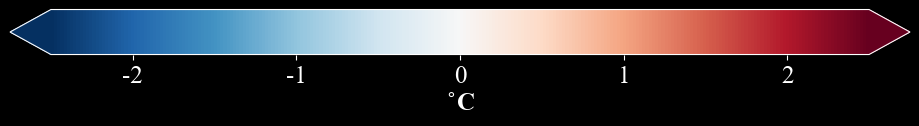

In [19]:
# Make a figure and axes with dimensions as desired.
fig = plt.figure(figsize=(10, 3), facecolor=bgcolor)
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
cmap = mpl.cm.RdBu_r
normanom = mpl.colors.Normalize(vmin=-2.5, vmax=2.5)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=normanom,
                                orientation='horizontal', extend="both", format='%d')

cb1.set_label("$^{\circ}$C", fontsize=18, color=fgcolor, fontweight="bold")

cb1.ax.tick_params(axis='x', colors=fgcolor)
#cb1.ax.set_xticklabels(np.arange(-2., 2.1), color=fgcolor,  
#                       fontsize=16)

plt.savefig(os.path.join(figdir, "sst_colorbar.png"), dpi=300, bbox_inches="tight",
            facecolor=fig.get_facecolor())
plt.show()

## Regional

In [8]:
regions_coords = {"MedSea": (-7, 17, 30., 48.),
                  "Canary": (-19.0, -9., 26., 32.00),
                  "Atlantic": (-80., 0., 0., 40.)}
regionname = "Canary"
figdir_region = f"/home/ctroupin/data/SST/Global/figures/{regionname}"
if not os.path.exists(figdir_region):
    os.makedirs(figdir_region)

In [9]:
# Prepare coordinates and projection
year0 = yearlist[0]
monthlydir0 = f'{monthlydir}/{year0}'
coordinates = regions_coords[regionname]
coordinates2 = (coordinates[0] - 0.5, coordinates[1] + 0.5, coordinates[2] - 0.5, coordinates[3] + 0.5)

sstmonthfile = "/home/ctroupin/data/SST/Global/monthly/2000/TERRA_MODIS.20000201_20000229.L3m.MO.SST4.sst4.9km.nc"
SSTmonth = filament.SST()
SSTmonth.read_from_oceancolorL3(os.path.join(monthlydir, sstmonthfile), domain=coordinates2)

In [10]:
plt.close("all")
doplot = False
SSTmeananom = []
SSTmeantime = []
for year in range(2000, 2023):
    logger.info("Working on year {}".format(year))
    monthlydirmonth = f"{monthlydir}/{year}"
    monthlydiryear = f"{monthlydir}/{year}"
    
    if not(os.path.exists(monthlydirmonth)):
        logger.warning("Data directory does not exist")

    for imonth in range(1, 13):
        if imonth == 1:
            yearstart = 2001
        else: 
            yearstart = 2000
        if imonth <= 3:
            yearend = 2023
        else:
            yearend = 2022


        sstclimfile = filament.get_monthly_clim_filename(sat, sensor, yearstart, yearend, imonth, res="9km")
        sstmonthfile = filament.get_monthly_filename(sat, sensor, year, imonth, res="9km")
        sstclimfile = os.path.join(climdir, sstclimfile)
        sstmonthfile = os.path.join(monthlydiryear, sstmonthfile)


        if os.path.exists(sstclimfile):
            
            if os.path.exists(sstmonthfile):
                logger.debug("Working on month {}/12".format(imonth))
                # Read data (lon, lat and SST)
                SSTmonth = filament.SST()
                SSTmonth.read_from_oceancolorL3(sstmonthfile, domain=coordinates2)
                SSTclim = filament.SST()
                SSTclim.read_from_oceancolorL3(sstclimfile, domain=coordinates2)

                # Compute anomalies
                SSTanom = SSTmonth.field - SSTclim.field

                # Compute mean anomalies
                SSTmeananom.append(SSTanom.mean())
                SSTmeantime.append(datetime.date(year, imonth, 15))
            else:
                logger.warning(f"Monthly file {sstmonthfile} does not exist")
        else:
            logger.warning(f"Climatology monthly file {sstclimfile} does not exist")

INFO:SSTanom:Working on year 2000
INFO:SSTanom:Working on year 2001
INFO:SSTanom:Working on year 2002
INFO:SSTanom:Working on year 2003
INFO:SSTanom:Working on year 2004
INFO:SSTanom:Working on year 2005
INFO:SSTanom:Working on year 2006
INFO:SSTanom:Working on year 2007
INFO:SSTanom:Working on year 2008
INFO:SSTanom:Working on year 2009
INFO:SSTanom:Working on year 2010
INFO:SSTanom:Working on year 2011
INFO:SSTanom:Working on year 2012
INFO:SSTanom:Working on year 2013
INFO:SSTanom:Working on year 2014
INFO:SSTanom:Working on year 2015
INFO:SSTanom:Working on year 2016
INFO:SSTanom:Working on year 2017
INFO:SSTanom:Working on year 2018
INFO:SSTanom:Working on year 2019
INFO:SSTanom:Working on year 2020
INFO:SSTanom:Working on year 2021
INFO:SSTanom:Working on year 2022


## Time series
### Linear plot

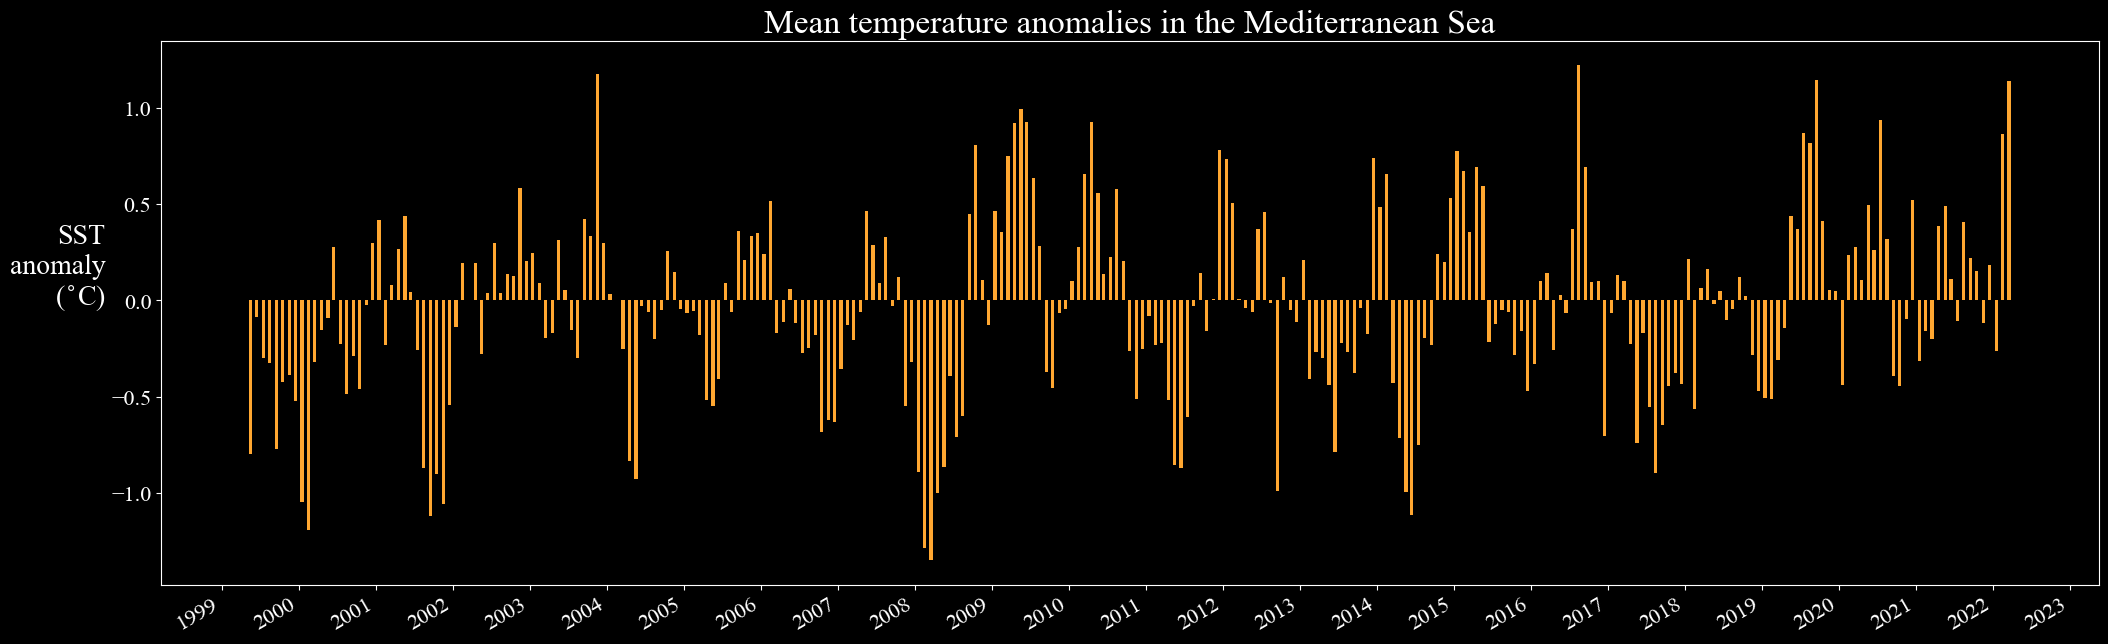

In [11]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(25, 8), facecolor=bgcolor)
ax = plt.subplot(111)
plt.bar(SSTmeantime, SSTmeananom, color="#FFA731", width=15)
plt.xticks([datetime.date(yyyy, 1, 1) for yyyy in range(2000, 2021)])
plt.ylabel("SST\nanomaly\n($^{\circ}$C)", rotation=0, ha="right", fontsize=20)

# Format time
fmt_year = mdates.MonthLocator(interval=12)
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_title("Mean temperature anomalies in the Mediterranean Sea")
fig.autofmt_xdate()
plt.savefig(os.path.join(figdir_region, "Canary_mean_SST.png"), facecolor=fig.get_facecolor(),
                dpi=300, bbox_inches="tight")
plt.show()

### Polar plot

In [135]:
monthlist = np.array([s.month for s in SSTmeantime])
yearlist = np.array([s.year for s in SSTmeantime])
anglelist = (monthlist - 1.) * np.pi / 6.

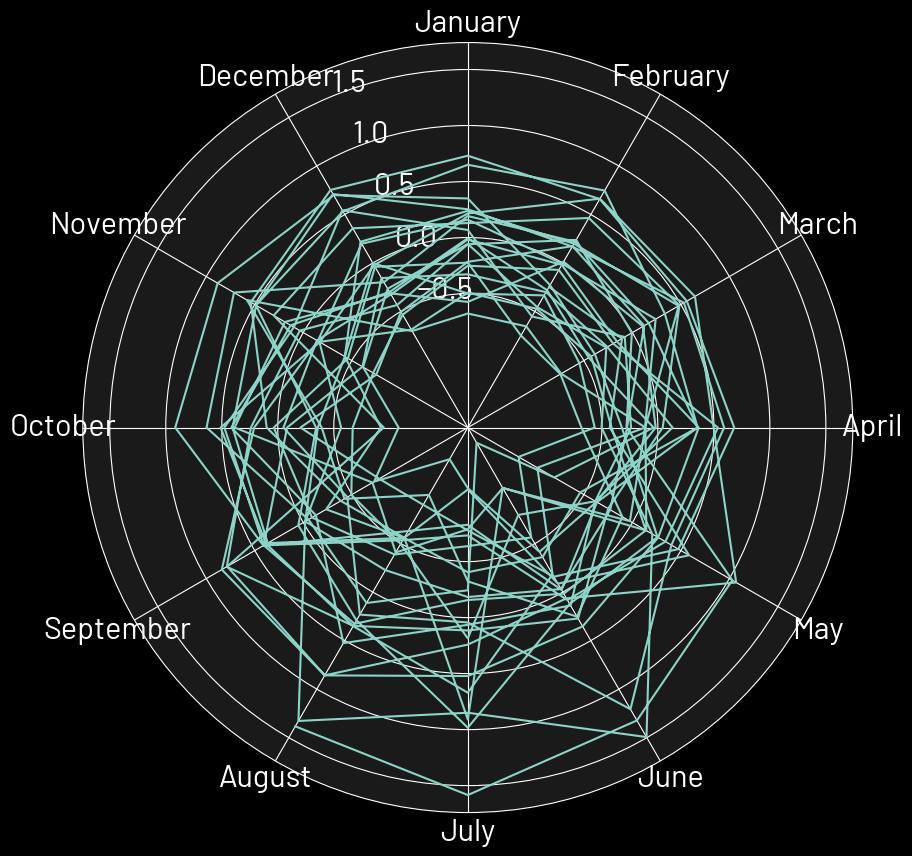

In [100]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection='polar')
ax.set_facecolor('.1')
ax.set_rticks([-0.5, 0., 0.5, 1, 1.5, 2])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 30), labels=[calendar.month_name[ii] for ii in range(1, 13)], 
                  fontsize=20, fontproperties=myfont)
plt.setp(ax.get_xticklabels(), fontproperties=myfont, fontsize=22)
plt.setp(ax.get_yticklabels(), fontproperties=myfont, fontsize=22)
#ax.scatter(anglelist, SSTmeananom, c=yearlist, s=40, cmap=plt.cm.RdYlBu_r)
ax.plot(anglelist, SSTmeananom)

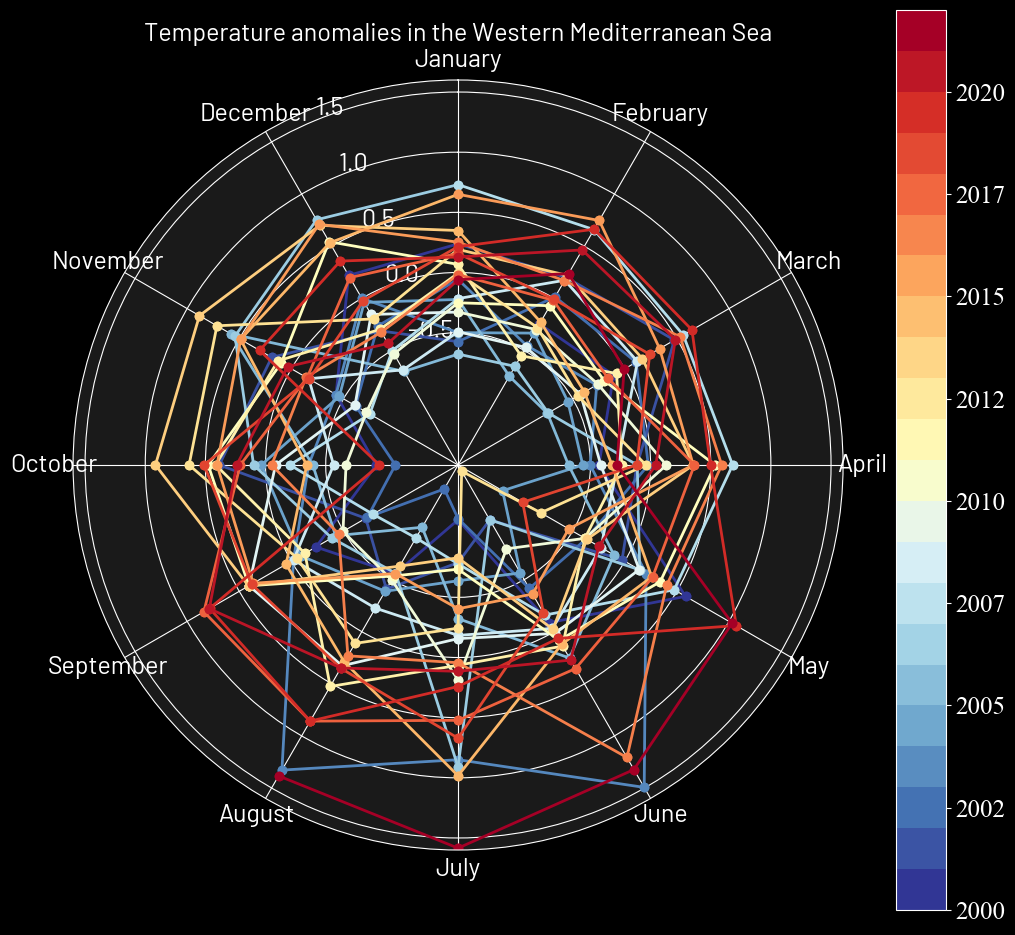

In [127]:
plt.style.use('dark_background')
yearnorm = colors.Normalize(vmin=2000, vmax=2022)
yearcmap = plt.cm.get_cmap('RdYlBu_r', 22)

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection='polar')
ax.set_facecolor('.1')
ax.set_rticks([-0.5, 0., 0.5, 1, 1.5, 2])  # less radial ticks
ax.set_rlim(-1.6, 1.6)
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 30), labels=[calendar.month_name[ii] for ii in range(1, 13)], 
                  fontsize=20, fontproperties=myfont)
plt.setp(ax.get_xticklabels(), fontproperties=myfont, fontsize=18)
plt.setp(ax.get_yticklabels(), fontproperties=myfont, fontsize=18)
#ax.scatter(anglelist, SSTmeananom, c=yearlist, s=40, cmap=plt.cm.RdYlBu_r)

ax.set_title("Temperature anomalies in the Western Mediterranean Sea", fontproperties=myfont)



ax2 = fig.add_axes([0.95, 0.05, 0.05, 0.9])
cmap = mpl.cm.RdBu_r
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=yearcmap,
                                norm=yearnorm,
                                orientation='vertical', format='%d')

#cb1.set_label("$^{\circ}$C", fontsize=18, rotation=0, color=fgcolor, fontweight="bold")

cb1.ax.tick_params(axis='x', colors=fgcolor)


for ii in range(0, len(anglelist)):
    ax.plot(anglelist[ii:ii+2], SSTmeananom[ii:ii+2], "o-", 
            color=plt.cm.RdYlBu_r(norm(yearlist[ii])), linewidth=2)
    iiii = str(ii).zfill(4)
    plt.savefig(os.path.join(figdirpolar, f"SST_anomalies_polar_{iiii}.png"), dpi=300, bbox_inches="tight")